In [1]:
from datasets import load_dataset

/Users/adharshvenkatachalam/Documents/Projects/Machine-Learning/news-bias-detection/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/adharshvenkatachalam/Documents/Projects/Machine-Learning/news-bias-detection/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
import pyarrow as pa
import pandas as pd

In [4]:
# If the dataset is gated/private, make sure you have run huggingface-cli login
dataset = load_dataset("newsmediabias/news-bias-full-data")

/Users/adharshvenkatachalam/Documents/Projects/Machine-Learning/news-bias-detection/.venv/lib/python3.9/site-packages/huggingface_hub/repocard.py:105: UserWarning: Repo card metadata block was not found. Setting CardData to empty.
  warnings.warn("Repo card metadata block was not found. Setting CardData to empty.")
Generating train split: 3674927 examples [00:20, 180189.92 examples/s]
Generating test split: 50001 examples [00:00, 261980.27 examples/s]


In [5]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'dimension', 'biased_words', 'aspect', 'label', 'sentiment', 'toxic', 'identity_mention'],
        num_rows: 3674927
    })
    test: Dataset({
        features: ['text', 'dimension', 'biased_words', 'aspect', 'label', 'sentiment', 'toxic', 'identity_mention'],
        num_rows: 50001
    })
})

In [9]:
type(dataset['train'])

datasets.arrow_dataset.Dataset

In [11]:
train_df = dataset['train'].to_pandas()

In [12]:
train_df

,text,dimension,biased_words,aspect,label,sentiment,toxic,identity_mention
0,Where will this leave the kids??? That my frie...,Ageism and sentiment,[],Transphobia,Slightly Biased,Negative,0.0,NO
1,I had a feeling of impending doom &amp; then ...,Ageism and sentiment,"['impending', 'doom']",Climate change,Highly Biased,Negative,1.0,NO
2,I no feel good ..,Ageism and sentiment,[],Body-shaming,Neutral,Positive,0.0,NO
3,"Back in Hotlanta for a about a week, then off ...",Ageism and sentiment,[],Lifestyle,Slightly Biased,Negative,0.0,NO
4,Kids toys &amp; stamping stuff cleaned up... N...,Ageism and sentiment,[],Hobby,Neutral,Neutral,1.0,NO
...,...,...,...,...,...,...,...,...
3674922,Congress was attacked which means our governme...,toxicity,[],Political,Slightly Biased,Negative,0.0,NO
3674923,"Not all of the citizens. Just militias, right ...",toxicity,['hate'],Criminal record discrimination,Slightly Biased,Neutral,1.0,NO
3674924,... funny pic of that kid thank god for sneeze...,toxicity,['sneeze'],Body-shaming,Slightly Biased,Positive,1.0,NO
3674925,"I find this whole discussion on the ""pooh `tin...",toxicity,['rhetoric'],Nation stereotype,Slightly Biased,Positive,0.0,NO


In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3674927 entries, 0 to 3674926
Data columns (total 8 columns):
 #   Column            Dtype  
---  ------            -----  
 0   text              object 
 1   dimension         object 
 2   biased_words      object 
 3   aspect            object 
 4   label             object 
 5   sentiment         object 
 6   toxic             float64
 7   identity_mention  object 
dtypes: float64(1), object(7)
memory usage: 224.3+ MB


In [15]:
# Describe the categorical data
train_df.describe(include='object')

,text,dimension,biased_words,aspect,label,sentiment,identity_mention
count,3674925,3674927,3674927,3496957,3674927,3674927,3674927
unique,3674782,6,422036,39,3,3,10
top,#NAME?,toxicity,[],Confirmation,Neutral,Positive,NO
freq,44,2089316,2450033,409120,1886253,1678586,3213974


In [16]:
# Describe the numerical data
train_df.describe()

,toxic
count,3.674927e+06
mean,3.338431e-01
std,4.715845e-01
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,1.000000e+00
max,1.000000e+00


In [18]:
# Check for missing values
train_df.isnull().sum()

text                     2
dimension                0
biased_words             0
aspect              177970
label                    0
sentiment                0
toxic                    0
identity_mention         0
dtype: int64

In [19]:
# Remove data with missing text
train_df = train_df.dropna(subset=['text'])

In [20]:
train_df.isnull().sum()

text                     0
dimension                0
biased_words             0
aspect              177969
label                    0
sentiment                0
toxic                    0
identity_mention         0
dtype: int64

<Axes: xlabel='dimension'>

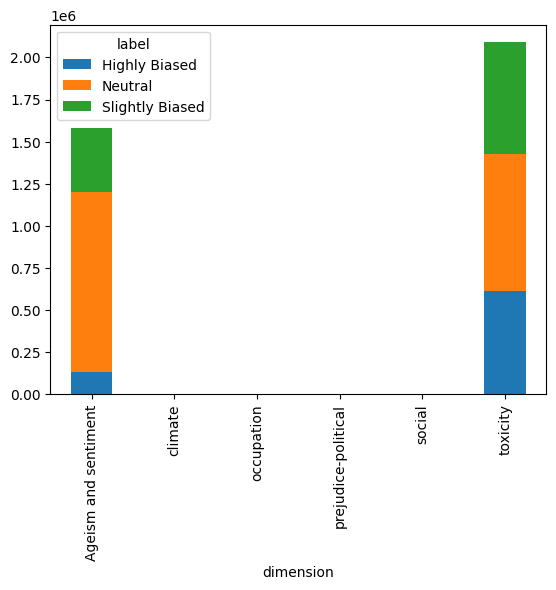

In [23]:
# Check distribution of label column based on dimension column
# plot the distribution of label column based on dimension column
train_df.groupby(['dimension', 'label']).size().unstack().plot(kind='bar', stacked=True)

In [27]:
len(train_df[train_df['dimension'].isin(['climate', 'occupation', 'prejudice-political', 'social'])].drop_duplicates())

4680

<Axes: xlabel='dimension'>

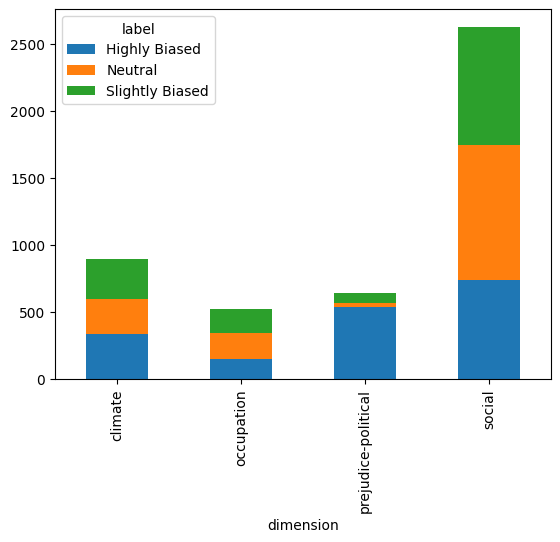

In [28]:
train_df[train_df['dimension'].isin(['climate', 'occupation', 'prejudice-political', 'social'])].groupby(['dimension', 'label']).size().unstack().plot(kind='bar', stacked=True)

In [29]:
# Since the number of samples in the dimensions climate, occupation, prejudice-political, and social are very low, we will remove them from the dataset
train_df = train_df[~train_df['dimension'].isin(['climate', 'occupation', 'prejudice-political', 'social'])]

In [30]:
# Removing the samples with these dimensions from the test data as well
test_df = dataset['test'].to_pandas()
test_df = test_df[~test_df['dimension'].isin(['climate', 'occupation', 'prejudice-political', 'social'])]

<Axes: xlabel='sentiment'>

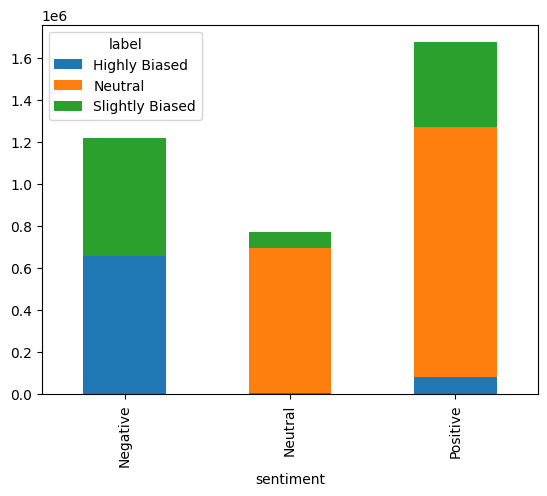

In [31]:
# Check the distribution of label column based on sentiment column
train_df.groupby(['sentiment', 'label']).size().unstack().plot(kind='bar', stacked=True)

<Axes: xlabel='aspect'>

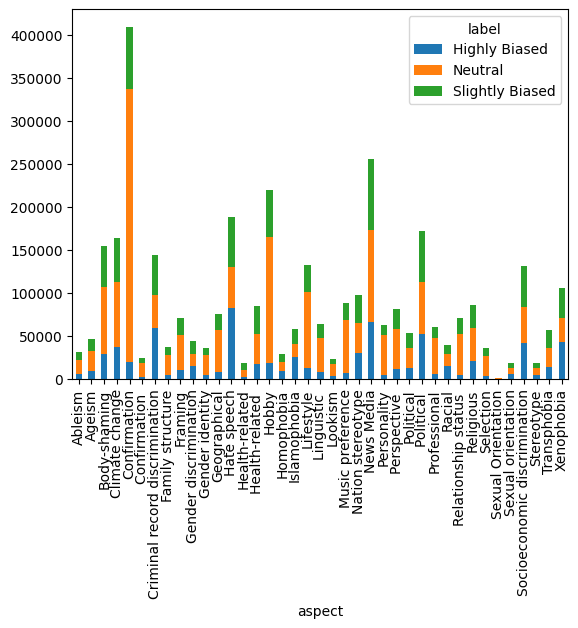

In [32]:
# Check the distribution of label column based on aspect column
train_df.groupby(['aspect', 'label']).size().unstack().plot(kind='bar', stacked=True)